In [1]:
from gnn_scheduler.jssp import get_stat_dataframe
from gnn_scheduler.difficulty_prediction import train_eval_test_split_by_name, get_stat_dataframe

/home/pablo/.cache/pypoetry/virtualenvs/gnn-scheduler-rnVoZpeL-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
folder_names = ["augmented_benchmark_10machines", "diff_prediction_instances"]
train, evaluation, test = train_eval_test_split_by_name(folder_names)

Loading instances: 100%|██████████| 49519/49519 [00:14<00:00, 3410.55it/s] 


In [3]:
# Print the length of each dataset
print(f"Train: {len(train)}")
print(f"Evaluation: {len(evaluation)}")
print(f"Test: {len(test)}")

Train: 56155
Evaluation: 14039
Test: 625


In [4]:
train_df = get_stat_dataframe(train)
evaluation_df = get_stat_dataframe(evaluation)
test_df = get_stat_dataframe(test)

<Axes: ylabel='Frequency'>

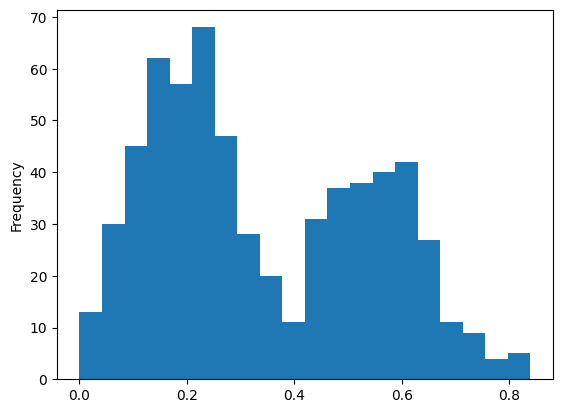

In [5]:
test_df.difficulty_score.plot.hist(bins=20)

<Axes: ylabel='Frequency'>

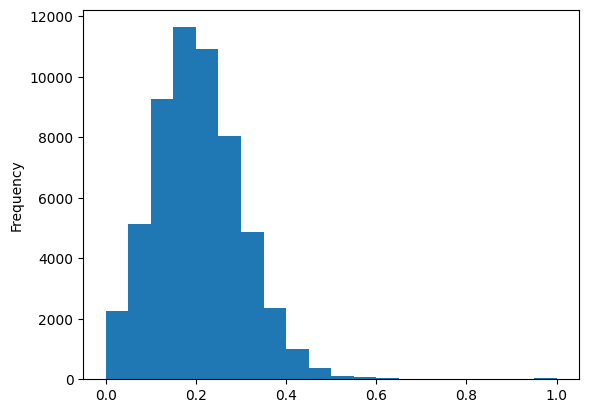

In [6]:
train_df.difficulty_score.plot.hist(bins=20)

In [7]:
# Sort test_df by difficulty_score
test_df.sort_values(by=["difficulty_score"]).head(10)

name  n_jobs  n_machines  \
552     la26_jobs=10-20_id=181_noise=10_id=181      17          10   
529  swv18_jobs=10-20_id=1037_noise=10_id=1037      14          10   
50   swv17_jobs=10-20_id=1018_noise=10_id=1018      20          10   
219     la33_jobs=10-20_id=275_noise=10_id=275      16          10   
155    swv16_jobs=10-20_id=981_noise=10_id=981      14          10   
428  swv17_jobs=10-20_id=1010_noise=10_id=1010      16          10   
448     la23_jobs=10-20_id=162_noise=10_id=162      15          10   
452     la30_jobs=10-20_id=216_noise=10_id=216      16          10   
282     la32_jobs=10-20_id=248_noise=10_id=248      13          10   
198  swv20_jobs=10-20_id=1119_noise=10_id=1119      18          10   

     max_machine_load_and_job_duration  upper_bound  is_optimal  no_solution  \
552                               1121         1121        True        False   
529                                960          960        True        False   
50                                1248         1248        True        False   
219                               1102         1110       False        False   
155                                970          993       False        False   
428                                997         1022       False        False   
448                               1060         1095       False        False   
452                               1166         1205       False        False   
282                               1005         1039       False        False   
198                               1258         1301       False        False   

     difficulty_score  
552          0.000000  
529          0.000000  
50           0.000000  
219          0.007260  
155          0.023711  
428          0.025075  
448          0.033019  
452          0.033448  
282          0.033831  
198          0.034181

In [8]:
from gnn_scheduler.jssp import JobShopInstance
from gnn_scheduler import get_data_path
folder_path = get_data_path() / "augmented_benchmark_10machines"
easiest_instance = JobShopInstance.load(folder_path / "la26_jobs=10-20_id=181_noise=10_id=181.pkl")

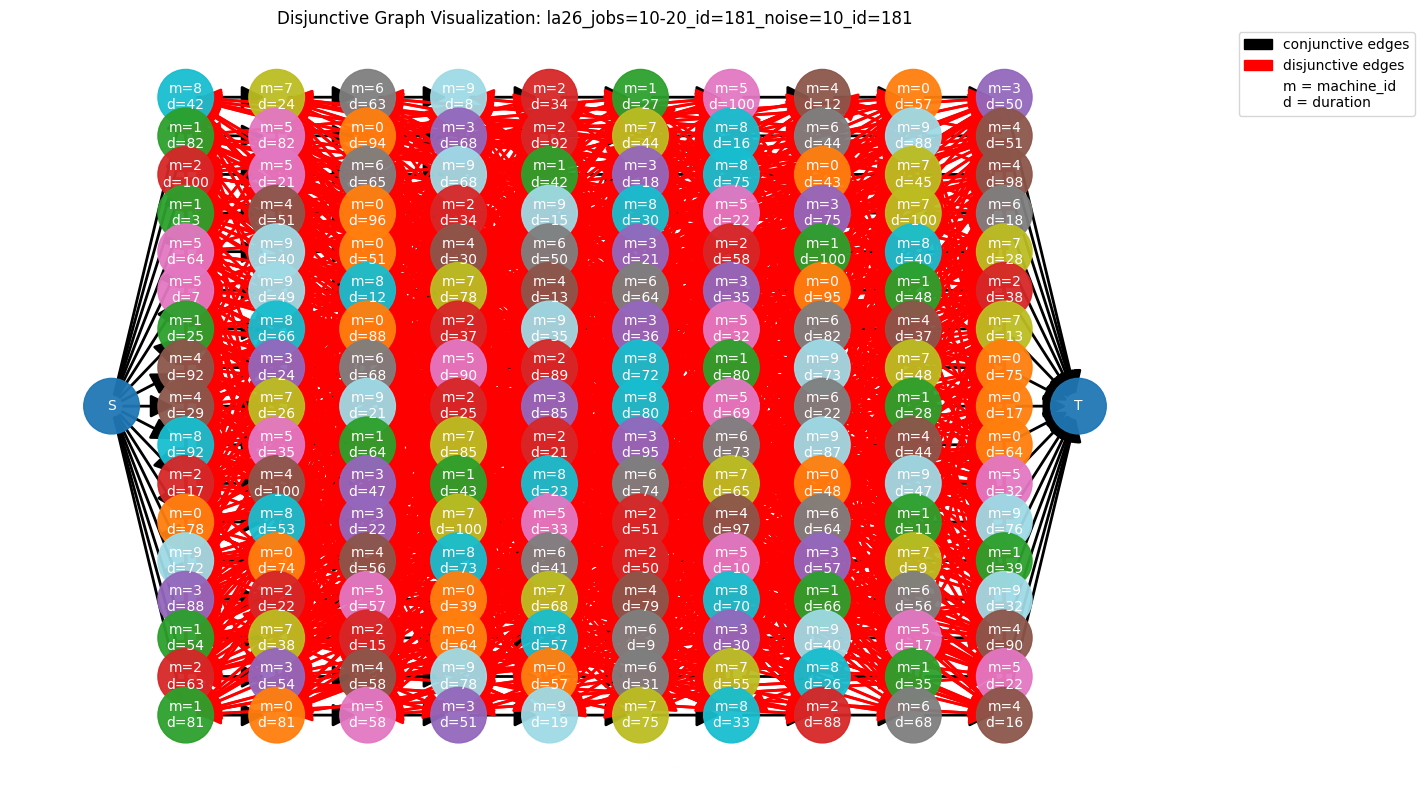

In [12]:
easiest_instance.disjunctive_graph.plot(color_map="tab20");

In [11]:
# Sort test_df by difficulty_score
test_df.sort_values(by=["difficulty_score"], ascending=False).head(10)

name  n_jobs  n_machines  \
374  swv15_jobs=10-20_id=930_noise=10_id=930      11          10   
542  swv13_jobs=10-20_id=860_noise=10_id=860      19          10   
353  swv14_jobs=10-20_id=876_noise=10_id=876      16          10   
273  swv15_jobs=10-20_id=924_noise=10_id=924      17          10   
280  swv11_jobs=10-20_id=773_noise=10_id=773      20          10   
300  swv04_jobs=10-20_id=486_noise=10_id=486      15          10   
241  swv12_jobs=10-20_id=827_noise=10_id=827      16          10   
126  swv11_jobs=10-20_id=762_noise=10_id=762      15          10   
100  swv15_jobs=10-20_id=911_noise=10_id=911      13          10   
97   swv04_jobs=10-20_id=489_noise=10_id=489      12          10   

     max_machine_load_and_job_duration  upper_bound  is_optimal  no_solution  \
374                                636         1170       False        False   
542                               1022         1877       False        False   
353                                897         1633       False        False   
273                                895         1617       False        False   
280                               1189         2145       False        False   
300                                869         1550       False        False   
241                                944         1677       False        False   
126                                987         1739       False        False   
100                                763         1341       False        False   
97                                 719         1255       False        False   

     difficulty_score  
374          0.839623  
542          0.836595  
353          0.820513  
273          0.806704  
280          0.804037  
300          0.783659  
241          0.776483  
126          0.761905  
100          0.757536  
97           0.745480

In [14]:
most_difficult = JobShopInstance.load(folder_path / "swv15_jobs=10-20_id=930_noise=10_id=930.pkl")

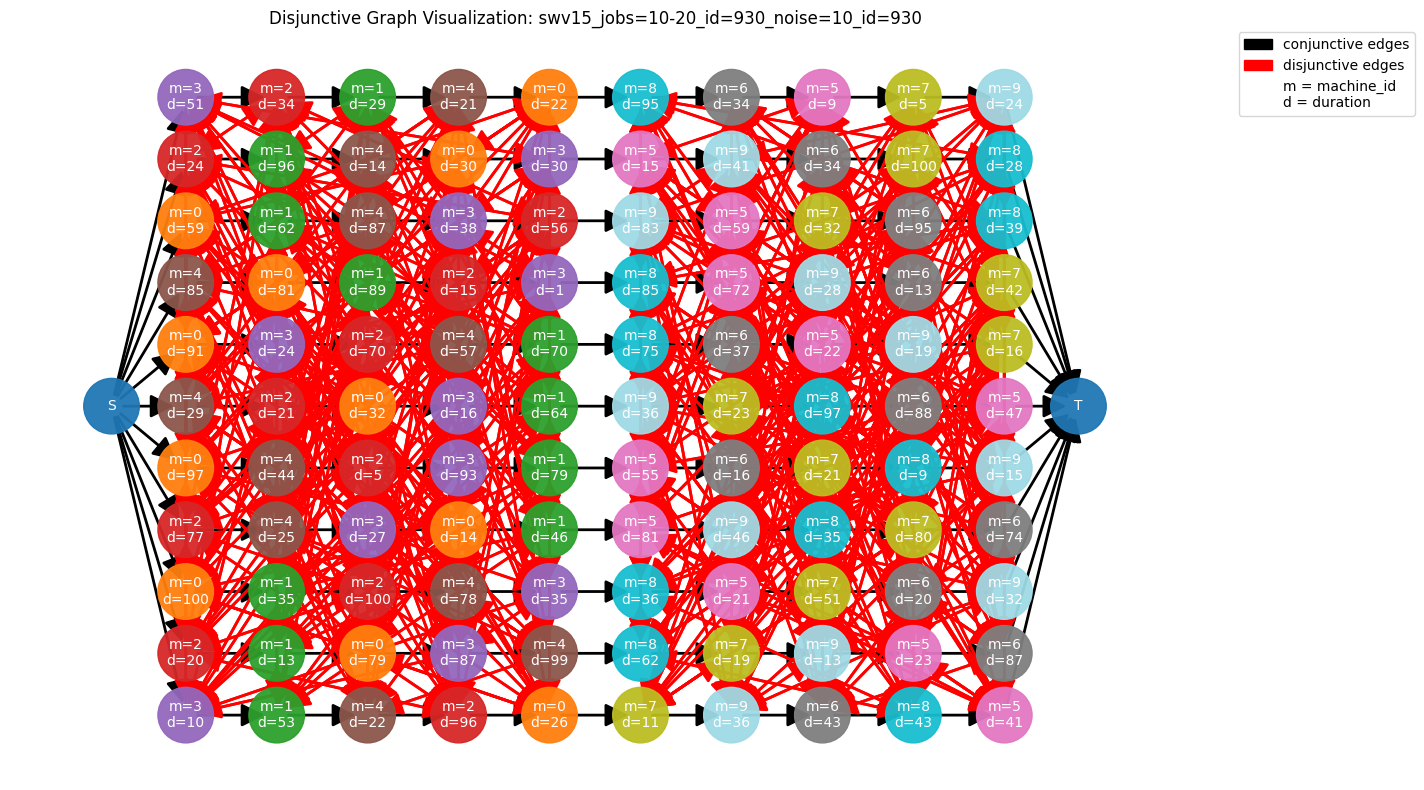

In [15]:
most_difficult.disjunctive_graph.plot(color_map="tab20");

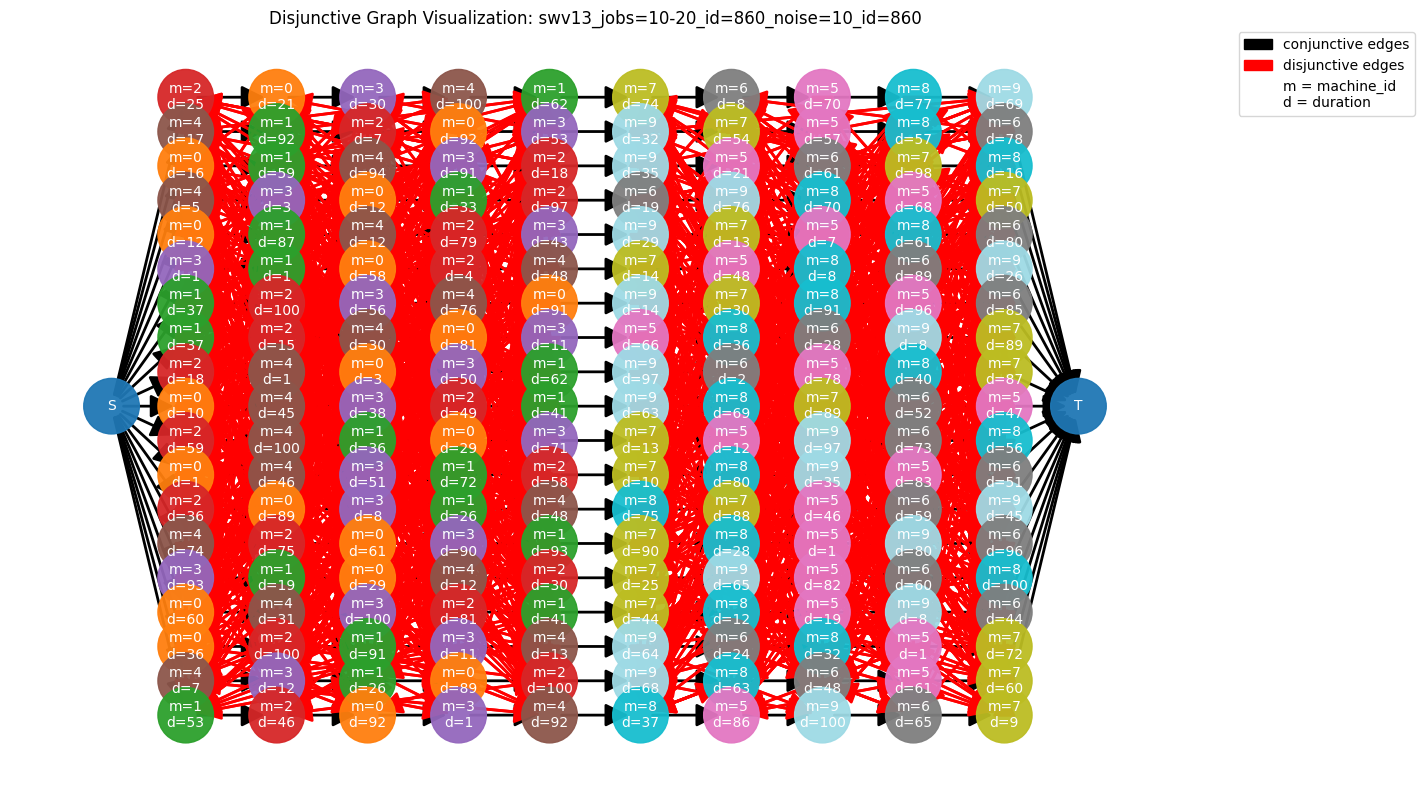

In [16]:
second_most_difficult = JobShopInstance.load(folder_path / "swv13_jobs=10-20_id=860_noise=10_id=860.pkl")
second_most_difficult.disjunctive_graph.plot(color_map="tab20");

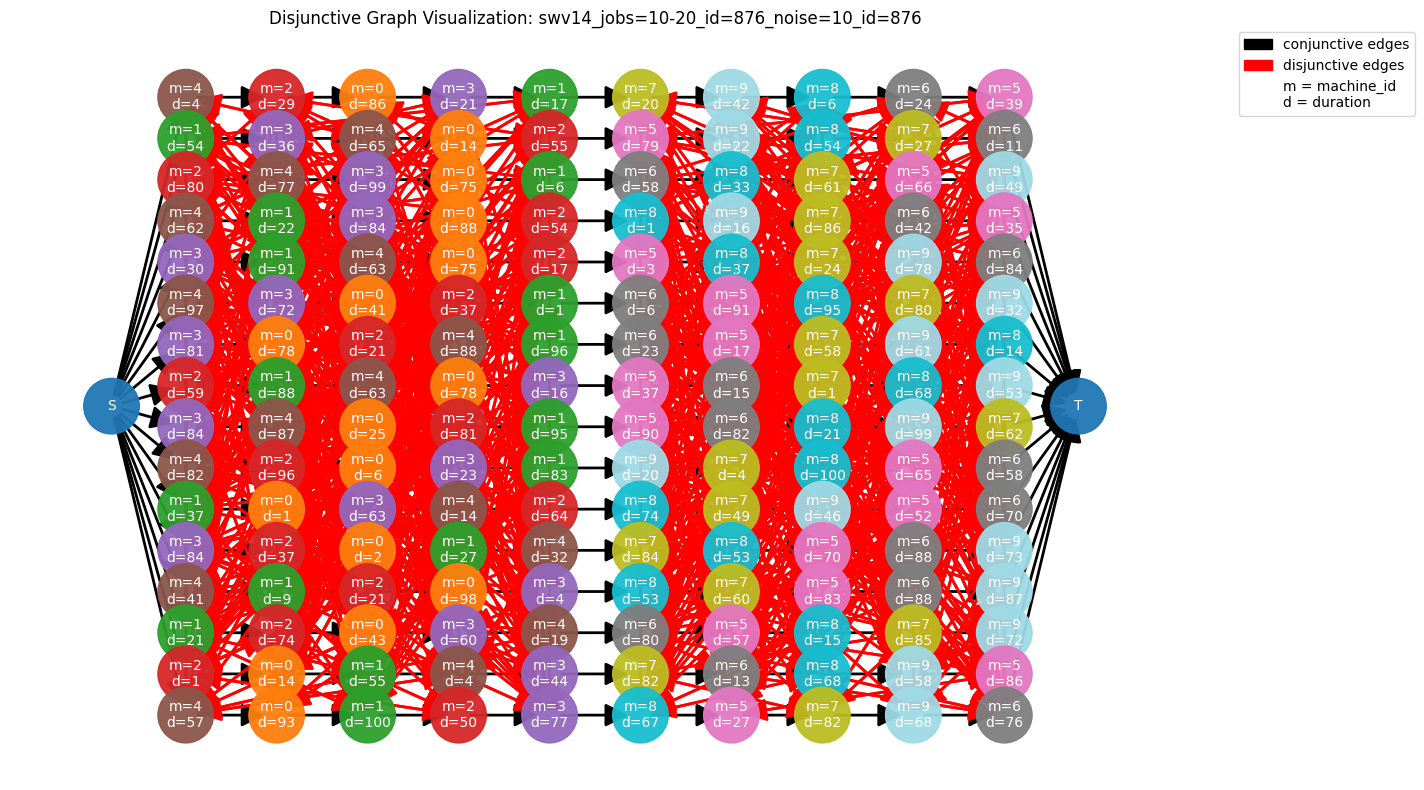

In [17]:
third_most_difficult = JobShopInstance.load(folder_path / "swv14_jobs=10-20_id=876_noise=10_id=876.pkl")
third_most_difficult.disjunctive_graph.plot(color_map="tab20");

In [18]:
# Most difficult instance that does not contain swv in the name
filtered_df = test_df[~test_df['name'].str.contains('swv')]
filtered_df.sort_values(by=["difficulty_score"], ascending=False).head(10)

name  n_jobs  n_machines  \
489  la34_jobs=10-20_id=301_noise=10_id=301      12          10   
218  la27_jobs=10-20_id=189_noise=10_id=189      10          10   
508  la32_jobs=10-20_id=246_noise=10_id=246      10          10   
396  la29_jobs=10-20_id=213_noise=10_id=213      12          10   
380  la35_jobs=10-20_id=315_noise=10_id=315      10          10   
178  la34_jobs=10-20_id=296_noise=10_id=296      16          10   
123  la21_jobs=10-20_id=151_noise=10_id=151      14          10   
569  la27_jobs=10-20_id=190_noise=10_id=190      17          10   
153  la35_jobs=10-20_id=321_noise=10_id=321      13          10   
275  la34_jobs=10-20_id=290_noise=10_id=290      10          10   

     max_machine_load_and_job_duration  upper_bound  is_optimal  no_solution  \
489                                678          983       False        False   
218                                686          993       False        False   
508                                735         1037       False        False   
396                                698          969       False        False   
380                                608          841       False        False   
178                                909         1242       False        False   
123                                833         1137       False        False   
569                               1003         1368       False        False   
153                                804         1094       False        False   
275                                662          900       False        False   

     difficulty_score  
489          0.449853  
218          0.447522  
508          0.410884  
396          0.388252  
380          0.383224  
178          0.366337  
123          0.364946  
569          0.363908  
153          0.360697  
275          0.359517

In [19]:
swv_instances = filtered_df = test_df[test_df['name'].str.contains('swv')]
swv_instances.sort_values(by=["difficulty_score"], ascending=True).head(10)

name  n_jobs  n_machines  \
50   swv17_jobs=10-20_id=1018_noise=10_id=1018      20          10   
529  swv18_jobs=10-20_id=1037_noise=10_id=1037      14          10   
155    swv16_jobs=10-20_id=981_noise=10_id=981      14          10   
428  swv17_jobs=10-20_id=1010_noise=10_id=1010      16          10   
198  swv20_jobs=10-20_id=1119_noise=10_id=1119      18          10   
499  swv17_jobs=10-20_id=1004_noise=10_id=1004      17          10   
258    swv16_jobs=10-20_id=989_noise=10_id=989      19          10   
243  swv19_jobs=10-20_id=1097_noise=10_id=1097      19          10   
127  swv20_jobs=10-20_id=1131_noise=10_id=1131      20          10   
565    swv16_jobs=10-20_id=959_noise=10_id=959      19          10   

     max_machine_load_and_job_duration  upper_bound  is_optimal  no_solution  \
50                                1248         1248        True        False   
529                                960          960        True        False   
155                                970          993       False        False   
428                                997         1022       False        False   
198                               1258         1301       False        False   
499                               1111         1149       False        False   
258                               1295         1347       False        False   
243                               1215         1270       False        False   
127                               1339         1403       False        False   
565                               1188         1247       False        False   

     difficulty_score  
50           0.000000  
529          0.000000  
155          0.023711  
428          0.025075  
198          0.034181  
499          0.034203  
258          0.040154  
243          0.045267  
127          0.047797  
565          0.049663

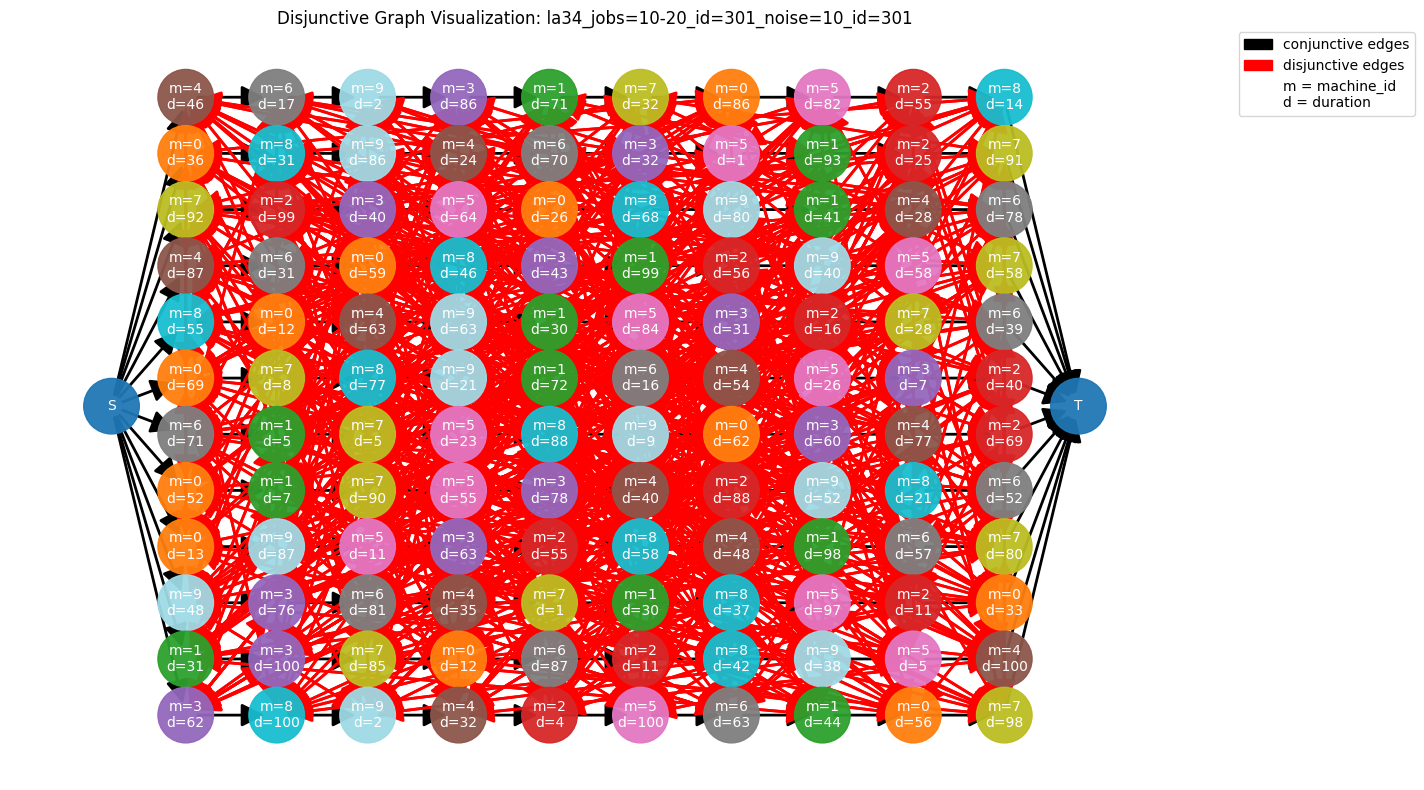

In [20]:
filtered_most_difficult = JobShopInstance.load(folder_path / "la34_jobs=10-20_id=301_noise=10_id=301.pkl")
filtered_most_difficult.disjunctive_graph.plot(color_map="tab20");

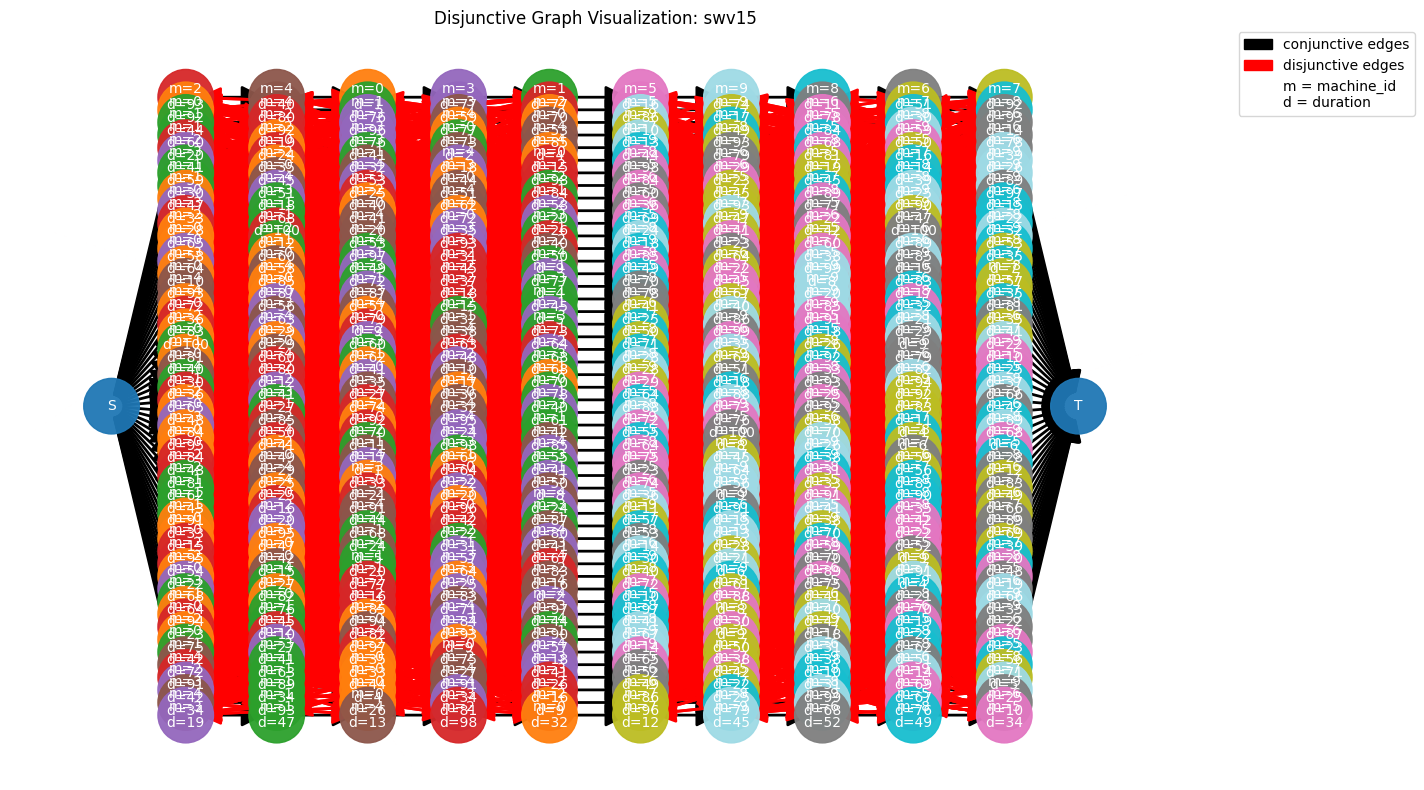

In [21]:
from gnn_scheduler.jssp import load_from_benchmark
swv15 = load_from_benchmark("swv15")
swv15.disjunctive_graph.plot(color_map="tab20");

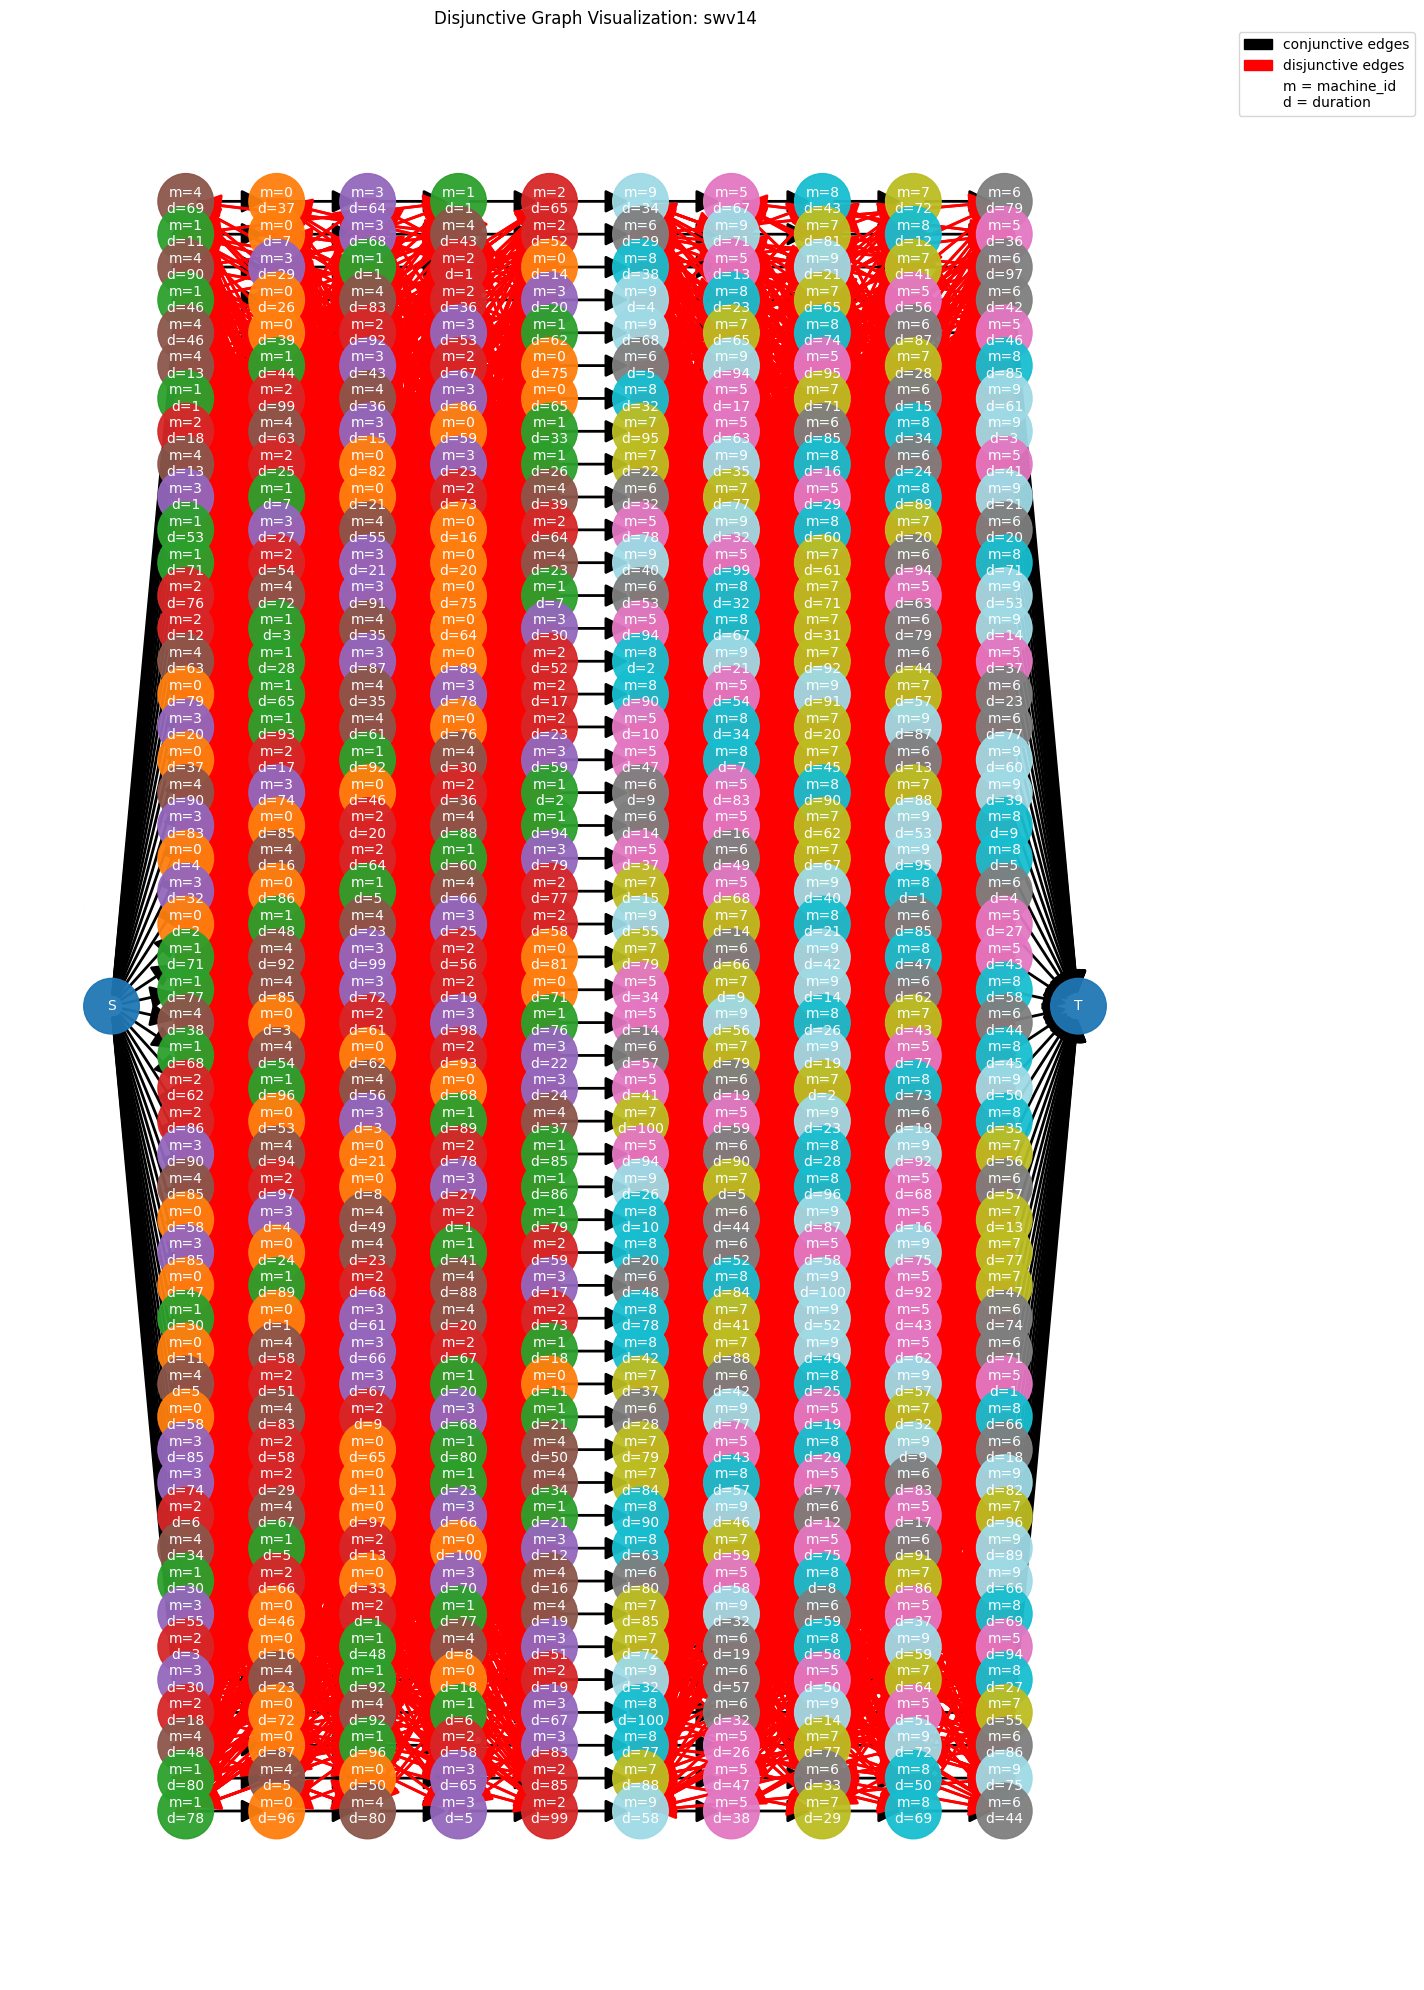

In [23]:
swv14 = load_from_benchmark("swv14")
swv14.disjunctive_graph.plot(color_map="tab20", figsize=(12, 20));